### metin ön işleme
- ham metin verilerini analiz ve işleme için uygun bir formata dönüştürme
- neden metin ön işleme yapılır?
    - veri kalitesini artırır
    - model performansını artırır
    - veri boyutunu yönetir
- 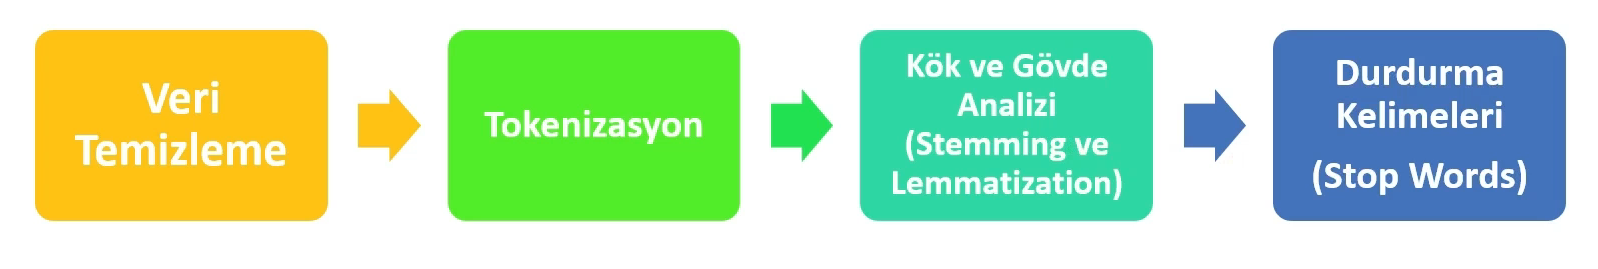
- 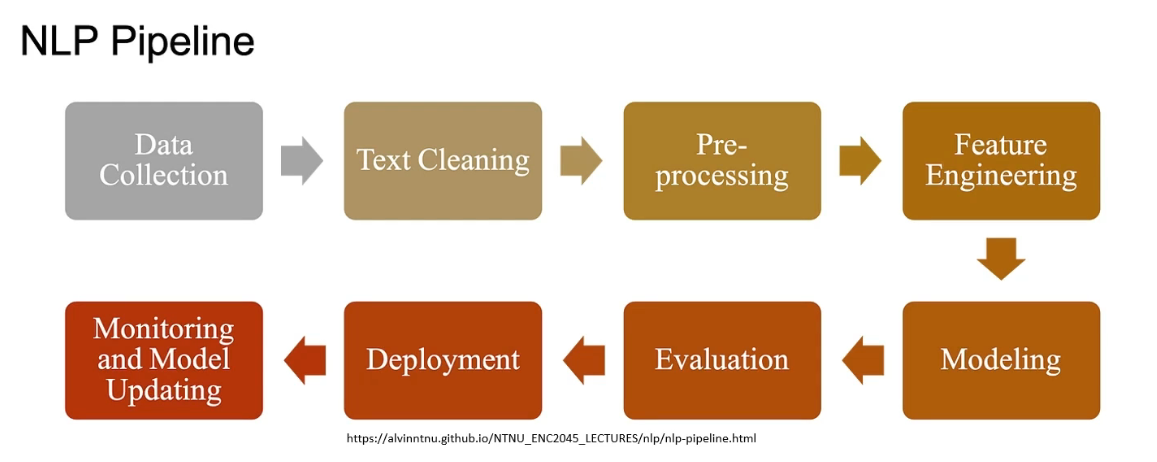

### veri temizleme
- metin verilerini analiz edilebilir hale getirir
- adımlar
    - boşlukları temizle
    - büyük-küçük harf dönüşümleri
    - noktalama işaretlerini kaldır (ama anlamı da etkileyeiblir)
    - özel karakterlerin kaldırılması
    - yazım hatalarını düzelt
    - html,url,coding etkiletlerini temizleme


In [18]:
text = " Hello,$ World! 2056"
splitted_txt=text.split()
print(splitted_txt)
cleaned_txt1=" ".join(text.split())
print(f"original text: {text} \n cleaned text: {cleaned_txt1}")

['Hello,$', 'World!', '2056']
original text:  Hello,$ World! 2056 
 cleaned text: Hello,$ World! 2056


In [19]:
lowered_txt=cleaned_txt1.lower()
print(lowered_txt)

hello,$ world! 2056


In [20]:
import string 
removed_punc = cleaned_txt1.translate(str.maketrans("","",string.punctuation))
print(removed_punc)

Hello World 2056


In [22]:
import re
text = "Hello, World! 2056%"
cleaned_text = re.sub(r"[^A-Za-z0-9\s]","",text)
print(cleaned_text)

Hello World 2056


In [25]:
from textblob import TextBlob

text = "Hellio Wirld! 2056"
cleaned_text = TextBlob(text).correct()
print(cleaned_text)



Hello World! 2056


In [27]:
from bs4 import BeautifulSoup
html_text="<div>   Hello World! 2056</div>"
cleaned_text = BeautifulSoup(html_text,"html.parser").get_text()
print(cleaned_text)

   Hello World! 2056


### tokenization
- metnin küçük parçalara ayrılmasıdır.
- küçük parçalar => token denir
- tokenlar => kelimeler, cümleler, hatta karakterler olabilir
- kelime tokenizasyonu, cümle tokenizasyonu
- 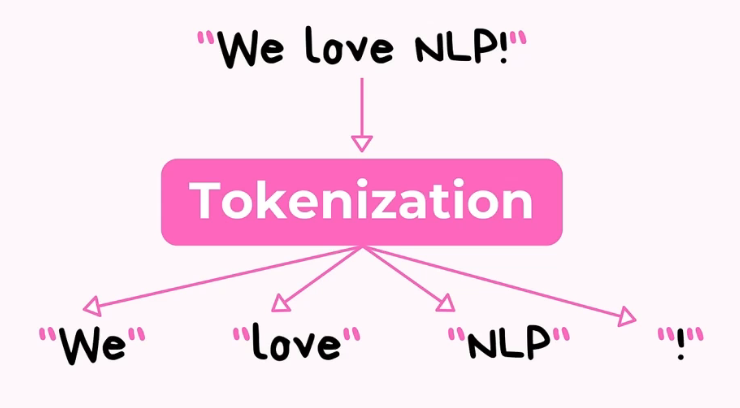

In [35]:
import warnings
warnings.filterwarnings("ignore")

import nltk
# dosyalari indir ilk kullanımda
#nltk.download("punkt")
#nltk.download('punkt_tab')

text = "Hello, World. How are you? Hi .."

## word token => metni kelimelere ayirir
word_tokens = nltk.word_tokenize(text)
print(word_tokens) ## boşluk, noktalama işaretleri de var

## sentence token => metni cümlelere ayirir
sent_tokens = nltk.sent_tokenize(text)
print(sent_tokens)


['Hello', ',', 'World', '.', 'How', 'are', 'you', '?', 'Hi', '..']
['Hello, World.', 'How are you?', 'Hi ..']


### stemming and lemmatization
- stemming => kelime sonlarindaki ekleri çıkarır, kökleri bulur. kelimenin en basit formunu bulur. anlamsız olabilir
    - otobüsler, otobüsümüz, otobosüm => ot
- lemming => kelimenin anlamını, dilbilgisi özelliklerini göz önünde bulundurarak doğru kök bulma işlemidir
    - otobüsler, otobüsümüz, otobosüm => otobüs

In [44]:
# nltk.download("wordnet") # lemmatization için gerekli veri tabanı
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
words = ["running","runner","ran","runs","go","better","went","played","playing"]
print(words)
stems = [stemmer.stem(w) for w in words]
print(stems)

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(w,pos="v") for w in words]
print(lemmas)




['running', 'runner', 'ran', 'runs', 'go', 'better', 'went', 'played', 'playing']
['run', 'runner', 'ran', 'run', 'go', 'better', 'went', 'play', 'play']
['run', 'runner', 'run', 'run', 'go', 'better', 'go', 'play', 'play']


### stop words
- metinde anlama etkisi az olan kelimeler ya da metin analizi sırasında çok faydalı olmayan kelimeler
    - ing stop words => and, the ,is, to ,of
    - tr stop words => ve, bir, bu, ile, da/de
      

In [58]:
import nltk 
from nltk.corpus import stopwords

# nltk.download("stopwords")

stop_words = set (stopwords.words("english"))
#print(stop_words)
text = "There are some examples of handling stop words from a text."
text = text.translate(str.maketrans("","",string.punctuation))
text_tokens = nltk.word_tokenize(text)
filtered_words = [word for word in text_tokens if word.lower() not in stop_words]
print(filtered_words)

stop_words_tr = set (stopwords.words("turkish"))
text= "Merhaba millet. Çok çalışmalı bu konuya. Bu ders eğlenceli, di mi?"
text = text.translate(str.maketrans("","",string.punctuation))
text_tokens = nltk.word_tokenize(text)
filtered_words = [word for word in text_tokens if word.lower() not in stop_words_tr]
print(filtered_words)

my_stop_words = ["çok","bu","di","mi"]
text= "Merhaba millet. Çok çalışmalı bu konuya. Bu ders eğlenceli, di mi?"
text = text.translate(str.maketrans("","",string.punctuation))
text_tokens = nltk.word_tokenize(text)
filtered_words = [word for word in text_tokens if word.lower() not in my_stop_words]
print(filtered_words)


['examples', 'handling', 'stop', 'words', 'text']
['Merhaba', 'millet', 'çalışmalı', 'konuya', 'ders', 'eğlenceli', 'di', 'mi']
['Merhaba', 'millet', 'çalışmalı', 'konuya', 'ders', 'eğlenceli']
